# PPGEE0260: Modelagem e Simulação Discreta de Sistemas

Aluno: Carlos André de Mattos Teixeira

Código baseado em: https://github.com/williewheeler/stats-demos/blob/master/queueing/single-queue-sim.ipynb 


## Descrição
Objetivo: Adicionar dois novos eventos no simulador de fila M/M/1.

O código fornecido durante a aula contém um exemplo de simulação M/M/1, ou seja, um sistema de fila que contém um único servidor com chegadas e tempos de serviço determinados por uma distribuição exponencial, neste caso.  A simulação em questão representa um sistema de filas com um pré-determinado número de clientes a serem atendidos ao longo da execução da simulação. A chegada de clientes obedece uma distribuição exponencial, gerada por um processo de Poisson com taxa $\lambda$. Os tempos de serviço também são distribuídos exponencialmente, com uma taxa fixa $\mu$

A Figura 1 ilustra o diagrama de transição entre estados deste sistema M/M/1. Caso um pacote esteja sendo atendido durante a chegada de outros pacotes, a fila é incrementada e os pacotes em espera são atendidos em uma política FIFO. 

Cada execução é realizada com base em certos parâmetros pré-estabelecidos. Dentre eles estão o tempo médio de que os pacotes passam na fila, o atraso médio e a utilização do servidor $P = \lambda / (c*\mu)$, onde 𝝺 representa o tempo médio de serviço, $c$ o número de servidores do sistema (no caso, 1) e 𝝻 o tempo médio de chegada. Ao final de cada execução são calculadas e exibidas as métricas de desempenho.


![image](images/mm1-diagram.png)

A proposta deste trabalho é incrementar a simulação estudada em sala adicionando 2 novos tipos de eventos, listados a seguir. Considerando que o sistema representa um fila de atendimento atendida por apenas um servidor, o eventos que podem ocorrer durante o antendimento são os seguintes (os eventos 2 e 3 foram adicionados):

1. **Atendimento sem ocorrências**
- Neste caso o atendimento do cliente ocorre normalmente, de acordo com o tempo médio esperado.
    
2. **Atendimento com ocorrências**
- Este caso simula a ocorrência de um imprevisto, causando um atendimento mais demorado.
    
3. **Impossibilidade de Atendimento**
- Este caso simula a impossibilidade de atendimento de um cliente, que é dispensado após chegar no servidor.


## Métricas de Desempenho

As seguintes métricas de desempenho serão utilizadas para avaliar cada simulação do sistema de filas M/M/1:

- **Duração Total:** Duração total da simulação.

- **Taxas Médias:**
    - Taxa de Chegada ($\lambda$): Número de clientes que chegam no sistema por unidade de tempo.
    - Tempo entre Chegadas ($1/\lambda$): Tempo entre duas chegadas consecutivas.
    - Tempo de Resposta: Tempo que os clientes passam no sistema
    - Tempo de Espera: Tempo que os clientes esperam antes de serem atendidos.
    - Taxa de Serviço ($\mu$): Número de clientes atendidos por unidade de tempo.
    - Tempo de Serviço($1/\mu$): Duração do serviço.
    - Clientes no Sistema: Número de clientes no sistema a cada instante de tempo.
    - Clientes na Fila: Número de clientes na fila a cada instante de tempo.
    - Throughput: Número médio de clientes atendidos por unidade de tempo.
    - Utilização: Intensidade do tráfego.

## Set-up do Projeto

Três simulações diferentes serão executadas para demostrar o comportamento do sistema em diferentes cenários:

- **Experimento 1:** Sistema com Carga Baixa ($\lambda << \mu$)
- **Experimento 2:** Sistema com Carga Moderada ($\lambda \approx \mu$)
- **Experimento 3:** Sistema com Carga Alta ($\lambda >> \mu$)

In [19]:
# Recarregar módulos automaticamente
%load_ext autoreload
%autoreload 2
   
from src.source import *
from src.settings import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experimento 1: Sistema com Carga Baixa ($\lambda < \mu$)

O Experimento 1 tem como objetivo simular um sistema de fila M/M/1 com baixa carga, ou seja, a taxa de chegada de clientes é consideravelmente menor do que a taxa média de atendimento. É de se esperar que o servidor ficara ocioso grande parte do tempo.

|Parâmetros                  |Variável              | Valor  |
|----------------------------|----------------------|--------|
|Número de Clientes          |`NUM_JOBS`            |   500  |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   8    |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32   |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 8.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.1250
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 63.2420



Taxas Médias:

Taxa de Chegada                 = 7.9027
Tempo entre Chegadas            = 0.1265
Tempo de Resposta               = 0.1048
Tempo de Espera                 = 0.0545
Taxa de Serviço                 = 19.8916
Tempo de Serviço                = 0.0503
Clientes no Sistema             = 0.8283
Clientes na Fila                = 0.4308
Throughput                      = 7.8125
Utilização                      = 0.3975





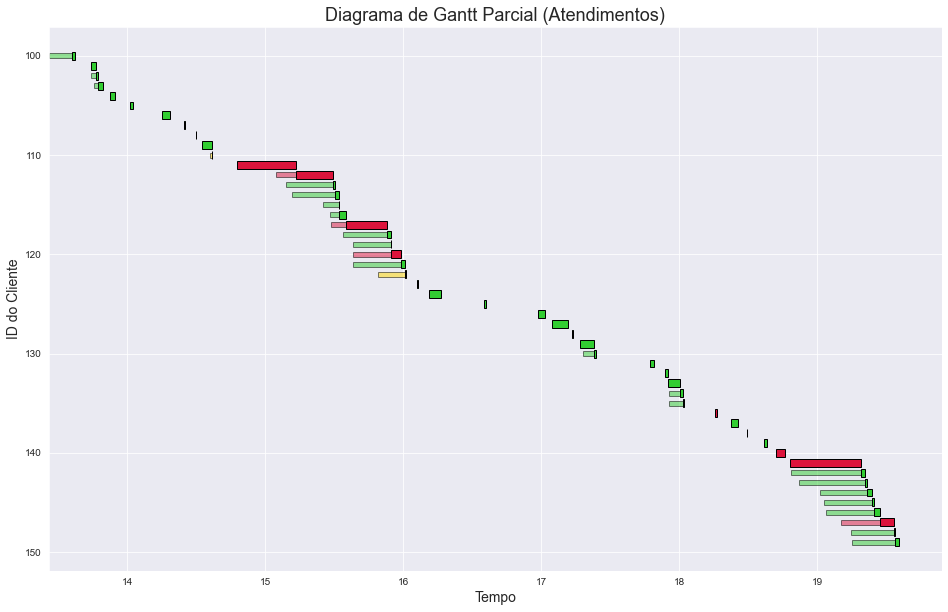

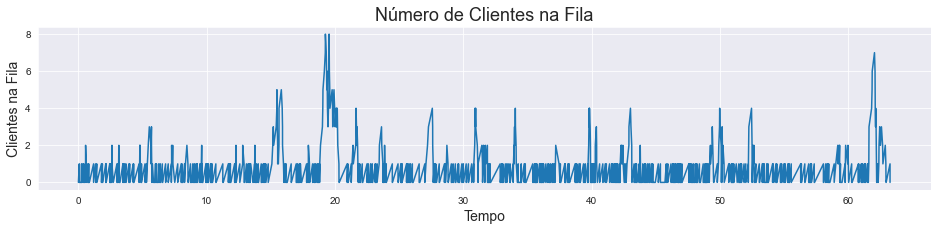

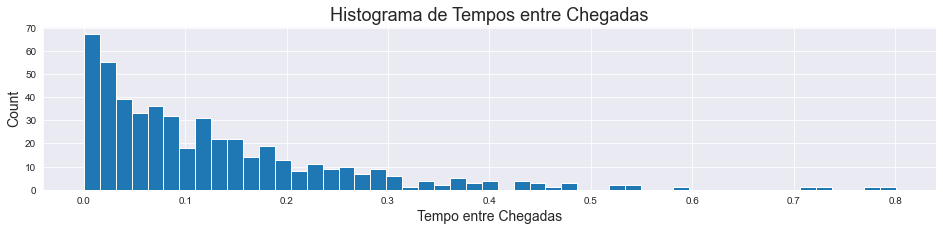

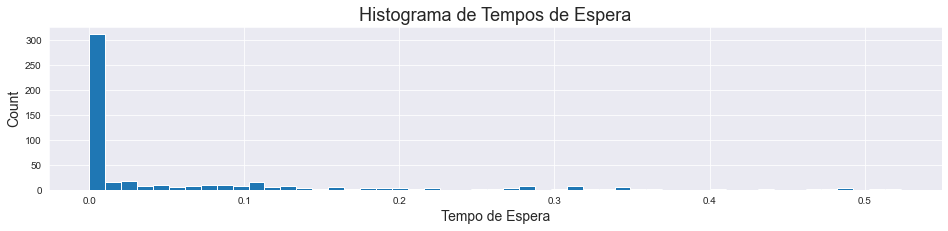

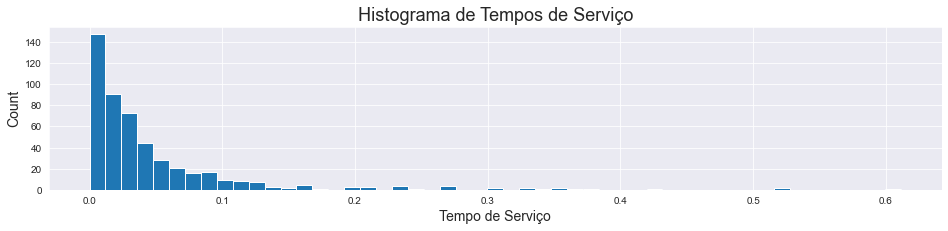

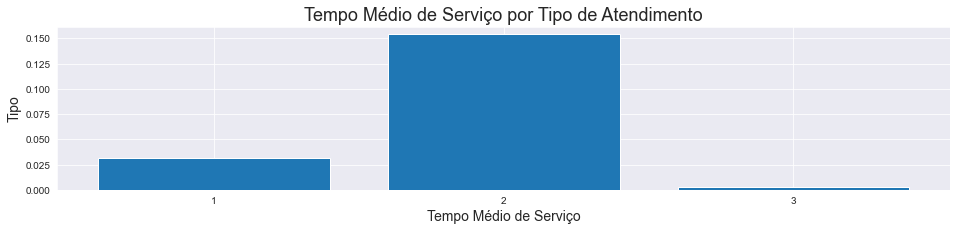

In [25]:
parameters = generate_parameters(500, 8, 32)
results_sim1 = run_sim_and_plot(parameters)

A simulação do experimento 1 foi executada com uma duração total de 63.2 unidades de tempo.

Com a taxa média de chegada de 8.0 clientes e taxa média de serviço de 32.0, os 500 clientes que chegaram no sistema foram atendidos de forma tranquila. No diagrama de Gantt é possível observar diversos espaços de tempo em que o servidor está ocioso.

Ao longo da simulação, a ocorrência de eventos do tipo 2 causou atrasos pontuais. Este fato pode ser observado no gráfico de Número de Clientes na Fila, que apresenta alguns picos de clientes ao longo do tempo.

O último gráfico ilustra o impacto dos eventos de tipo 2, com elevados tempos de atendimento em relação aos eventos 1 e 3.

**Por fim, a utilização do sistema foi de apenas 0.3975, o que indica um possível desperdício de recursos, visto que o sistema fica ocioso por muito tempo.**

## Experimento 2: Sistema com Carga Moderada ($\lambda \approx \mu$)

O Experimento 2 tem como objetivo simular um sistema de fila M/M/1 com carga moderada, ou seja, a taxa de chegada de clientes é similar da taxa média de atendimento. Neste cenário, apesar de em teoria o servidor conseguir atender aos clientes sem grandes problemas, a introdução dos atrasos dos eventos do tipo 2 deve introduzir um alto nível de estresse no sistema.

|Parâmetros                  |Variável              | Valor  |
|----------------------------|----------------------|--------|
|Número de Clientes          |`NUM_JOBS`            |   500  |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   32   |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32   |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 28.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.0357
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 24.6185



Taxas Médias:

Taxa de Chegada                 = 28.3666
Tempo entre Chegadas            = 0.0353
Tempo de Resposta               = 4.1138
Tempo de Espera                 = 4.0648
Taxa de Serviço                 = 20.4199
Tempo de Serviço                = 0.0490
Clientes no Sistema             = 83.5502
Clientes na Fila                = 82.5555
Throughput                      = 20.0000
Utilização                      = 0.9946





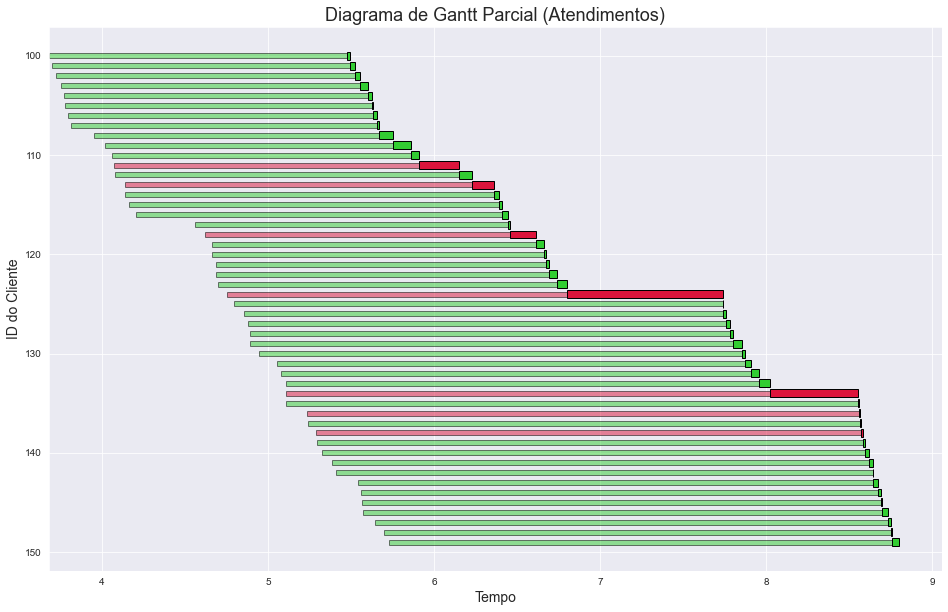

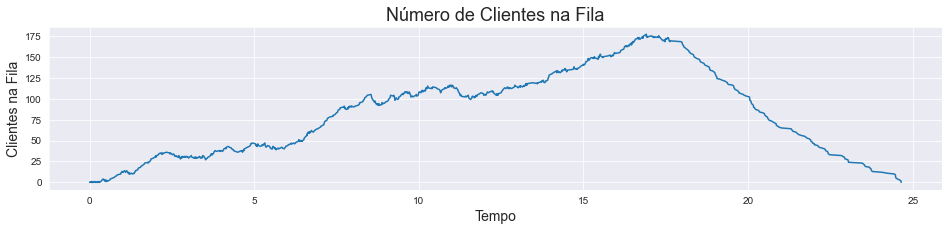

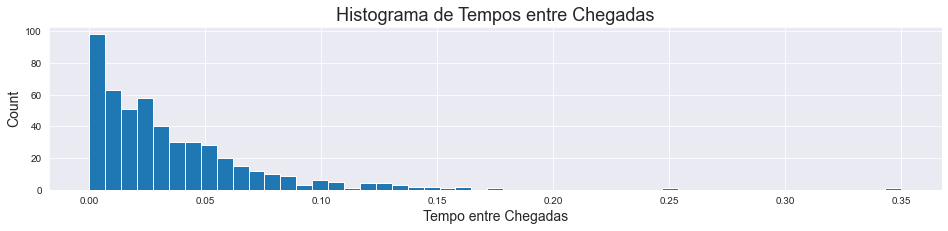

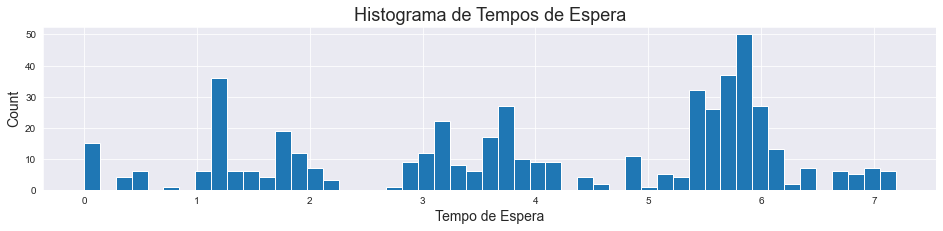

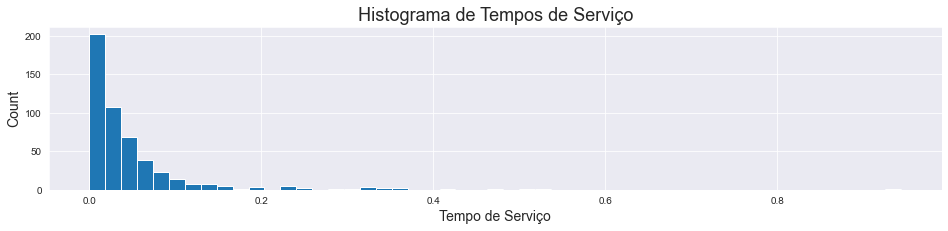

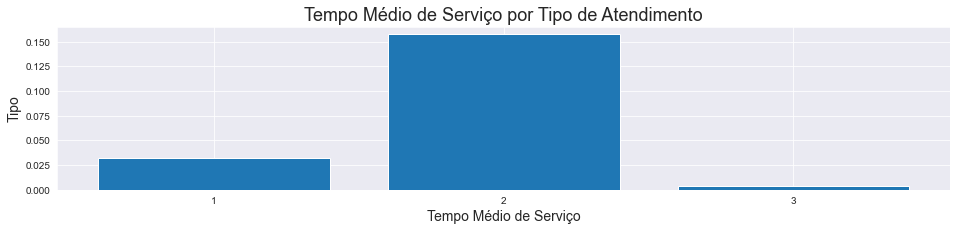

In [22]:
parameters = generate_parameters(500, 28, 32)

results_sim2 = run_sim_and_plot(parameters)

A simulação do experimento 2 foi executada com uma duração total de 27.2 unidades de tempo.

Com a taxa média de chegada de 28.0 clientes e taxa média de serviço de 32.0, os 500 clientes que chegaram no sistema acabaram enfrentando atrasos no atendimento. No diagrama de Gantt é possível observar os tempos de espera.

O tempo médio de espera dos clientes foi de 4.06 unidades de tempo, um aumento de mais de 4x em relação ao experimento 1. No histograma de tempos de espera é possível observar a divisão causada pelos eventos de tipos 3, 1 e 2, respectivamente.

Ao longo da simulação, a ocorrência de eventos do tipo 2 contribuiu negativamente para os atrasos já existentes. O número de clientes na fila, como pode ser observado no gráfico, esteve em comportamento crescente até que a finalização da chegada de clientes, que ocorreu a aproximadamente 4/5 do tempo de simulação. Após a chegada de todos os clientes, o atendimento dos clientes em espera ocorrou rapidamente.


**Por fim, a utilização do sistema foi de 0.9946, o que indica que a utilização dos recursos do sistema está no limite do aceitável. Um aumento na capacidade de atendimento do servidor seria bem vindo para adicionar uma folga no sistema.**

## Experimento 3: Sistema com Carga Alta ($\lambda >> \mu$)

O Experimento 3 tem como objetivo simular um sistema de fila M/M/1 com carga alta, ou seja, a taxa de chegada de clientes é consideravelmente maior do que a taxa média de atendimento. Neste cenário, é espero que haja um grande congestionamento no atendimento dos clientes. É provável que este congestionamento se agrave com as ocorrências de eventos do tipo 2.

|Parâmetros                  |Variável              | Valor   |
|----------------------------|----------------------|---------|
|Número de Clientes          |`NUM_JOBS`            |   500   |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   64    |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32    |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 64.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.0156
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 26.6852



Taxas Médias:

Taxa de Chegada                 = 64.9279
Tempo entre Chegadas            = 0.0154
Tempo de Resposta               = 8.5140
Tempo de Espera                 = 8.4607
Taxa de Serviço                 = 18.7380
Tempo de Serviço                = 0.0534
Clientes no Sistema             = 159.5276
Clientes na Fila                = 158.5276
Throughput                      = 18.5185
Utilização                      = 0.9999





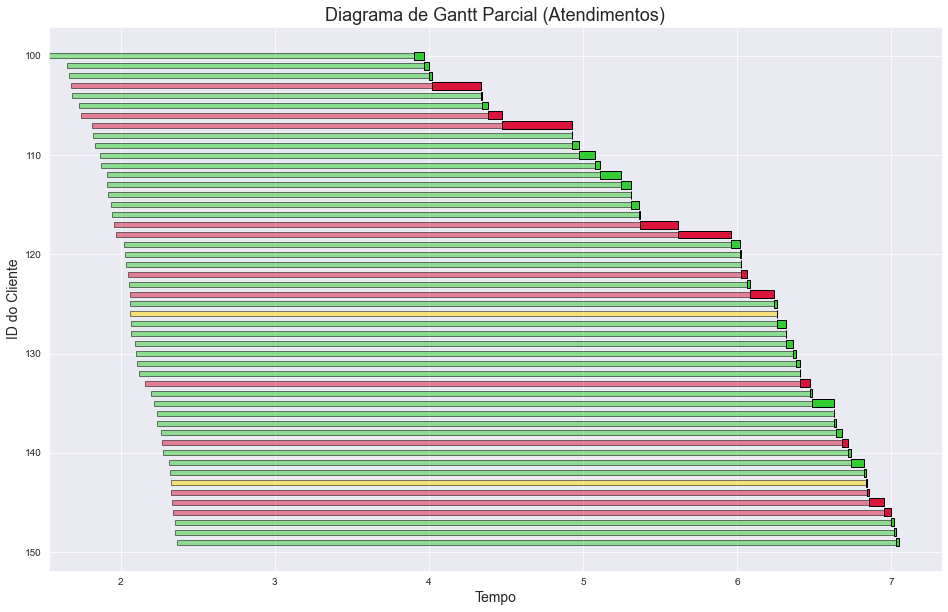

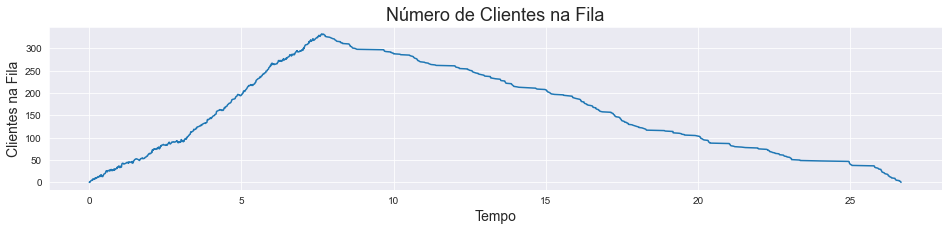

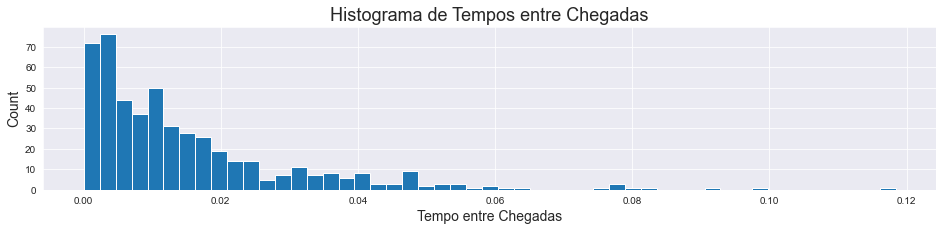

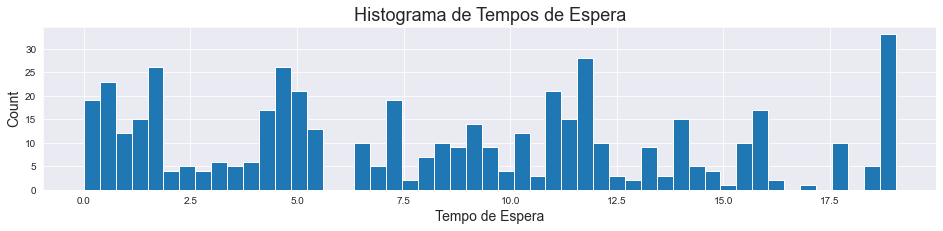

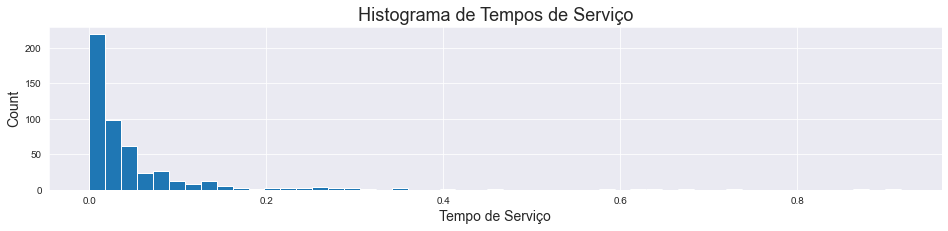

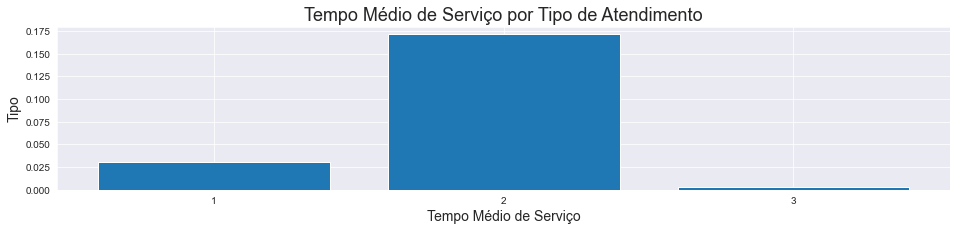

In [24]:
parameters = generate_parameters(500, 64, 32)

results = run_sim_and_plot(parameters)

A simulação do experimento 3 foi executada com uma duração total de 26.6 unidades de tempo.

Com a taxa média de chegada de 64.0 clientes e taxa média de serviço de 32.0, os 500 clientes que chegaram no sistema acabaram enfrentando atrasos consideráveis no atendimento. No diagrama de Gantt é possível observar os tempos de espera elevados.

O tempo médio de espera dos clientes foi de 8.46 unidades de tempo, o dobro do tempo de espera do experimento 1. No histograma de tempos de espera é possível observar a divisão causada pelos eventos de tipos 3, 1 e 2, respectivamente.

Ao longo da simulação, a ocorrência de eventos do tipo 2 contribuiu negativamente para os atrasos já existentes. Até os clientes de tipo 3, com impossibilidade de atendimento, enfretaram longas esperas para serem atendidos e dispensados pelo servidor.

O número de clientes na fila, como pode ser observado no gráfico, esteve em comportamento crescente até que a finalização da chegada de clientes, que ocorreu a aproximadamente 2/4 do tempo de simulação. Após a chegada de todos os clientes, o atendimento dos clientes ocorrou de forma lenta até o fim da simulação.

**Por fim, a utilização do sistema foi de 0.9999, o que indica que o sistema não é capaz de atender a demanda dos clientes. Um aumento na capacidade de atendimento do servidor é necessário para diminuir a utilização para um valor aceitável que proporcione uma melhor qualidade de atendimento.**

## Conclusão

Os três experimentos possibilitaram a observação do impacto da variação da taxa de chegada dos clientes em um sistema M/M/1. Entretanto, nem todos os experimentos apresentaram o comportamento esperado devido a inserção dos diferentes tipos de eventos. **A ocorrência de eventos do tipo 2 ressalta a necessidade do sistema operar com uma certa folga entre a taxa de chegada e a taxa de atendimento**.